## Classification Trees

In a classification tree we predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs.

The task of growing (inducing) a classification tree is typically recursive; that is we load data into a root node and successively split that node into two children, then those children each into two children, and so on.
This is referred to as _recursive binary splitting_ to grow a classification tree. 
The critical technique of learning the model parameters is the analysis of classification error rate per node. 
Since we plan to assign an observation in a given region to the most commonly occurring class of training observations in that region, the classification error rate is simply the fraction of the training observations in that region that do not belong to the most common class. 

Dig deeper: https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

We can define the classification error as such:

$$E = 1 - \max_k(\hat{p}_{mk})$$

Here $\hat{p}_{mk}$ represents the proportion of training observations in the $mth$ region that are from the $kth$ class. 
However, it turns out that classification error is not sufficiently sensitive for tree-growing, 
and in practice two other measures are preferable.

##### Gini index

$$ G = \sum_{k=1}^K\hat{p}_{mk}(1-\hat{p}_{mk})\ ,$$

The Gini index is a measure of total variance across the $K$ classes. 
It is not hard to see that the Gini index takes on a small value if all of the $\hat{p}_{mk}$'s are close to zero or one. 
For this reason the Gini index is referred to as a measure of **node purity** - 
a small value indicates that a node contains predominantly observations from a single class.

##### Cross-entropy

Cross-entropy is similar to Gini index, substituting $log\  \hat{p}_{mk}$ for $(1-\hat{p}_{mk})$.

$$D = -\sum_{k=1}^K \hat{p}_{mk}\ log\  \hat{p}_{mk}$$

Since 0 ≤ $\hat{p}_{mk}$ ≤ 1, it follows that 0 ≤ − $\hat{p}_{mk}$ log $\hat{p}_{mk}$. 
One can show that the cross-entropy will take on a value near zero if the $\hat{p}mk$’s are all near zero or near one. 
Therefore, like the Gini index, the cross-entropy will take on a small value if the $m^{th}$ node is pure.

When building a classification tree, either the Gini index or the cross-entropy are typically used to evaluate the quality of a particular split, 
since these two approaches are more sensitive to node purity than is the classification error rate.

### Fitting a Classification Tree

Decision trees can be constructed even in the presence of qualitative predictor variables. 
For instance, in the Carseat data below, some of the predictors, such as `ShelveLoc` and `Urban`
are qualitative. 
Therefore, a split on one of these variables amounts to assigning some of the qualitative values 
to one branch and assigning the remaining to the other branch.

We first use classification trees to analyze the <span style="color:#a5541a">Carseats</span> data set. 
In this data, <span style="color:#a5541a">Sales</span> is a continuous variable, and so we begin by recoding it as a binary variable. 
We use the `ifelse()` function to create a variable, called **High**, 
which takes on a value of **Yes** if the `Sales` variable exceeds 8, 
and takes on a value of **No** otherwise.

In [1]:
install.packages("ISLR")
library(ISLR)
attach(Carseats)
High=ifelse(Sales <= 8, "No", "Yes")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Finally, we use the <span style="color:#a5541a">data.frame()</span> function to merge <span style="color:#a5541a">High</span> with the rest of the <span style="color:#a5541a">Carseats</span> data.

In [2]:
Carseats = data.frame(Carseats, High)
str(Carseats)

'data.frame':	400 obs. of  12 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...
 $ High       : Factor w/ 2 levels "No","Yes": 2 2 2 1 1 2 1 2 1 1 ...


We now use the `rpart()` (recursive partition) function to fit a classification tree in order to predict **High** using all variables except `Sales`.

In [3]:
library(rpart)
rpart_tree <- rpart(High~.-Sales, method="anova", data=Carseats)

The <span style="color:#a5541a">summary()</span> function lists the variables that are used as internal nodes in the tree, the number of terminal nodes, and the (training) error rate.

In [4]:
summary(rpart_tree)

Call:
rpart(formula = High ~ . - Sales, data = Carseats, method = "anova")
  n= 400 

           CP nsplit rel error    xerror       xstd
1  0.14981343      0 1.0000000 1.0040242 0.01842455
2  0.08232006      1 0.8501866 0.8604726 0.03967745
3  0.05374168      2 0.7678665 0.8073603 0.04645067
4  0.04002485      3 0.7141248 0.7766622 0.04898223
5  0.03784177      4 0.6741000 0.7999538 0.05295736
6  0.03473658      6 0.5984164 0.7793612 0.05310501
7  0.02168947      7 0.5636799 0.7833881 0.05890881
8  0.02067219      9 0.5203009 0.7681170 0.06108037
9  0.01721821     10 0.4996287 0.7806636 0.06301789
10 0.01291856     11 0.4824105 0.7668835 0.06293827
11 0.01170753     12 0.4694920 0.7443636 0.06150470
12 0.01000000     13 0.4577844 0.7554123 0.06220813

Variable importance
      Price   ShelveLoc   CompPrice Advertising         Age      Income 
         32          23          12          11          10           8 
 Population   Education       Urban 
          3           1           

We use the plot() function to display the tree structure, 
and the text() function to display the node labels. 

The argument `pretty=0` instructs R to include the category names for any qualitative predictors, 
rather than simply displaying a letter for each category.

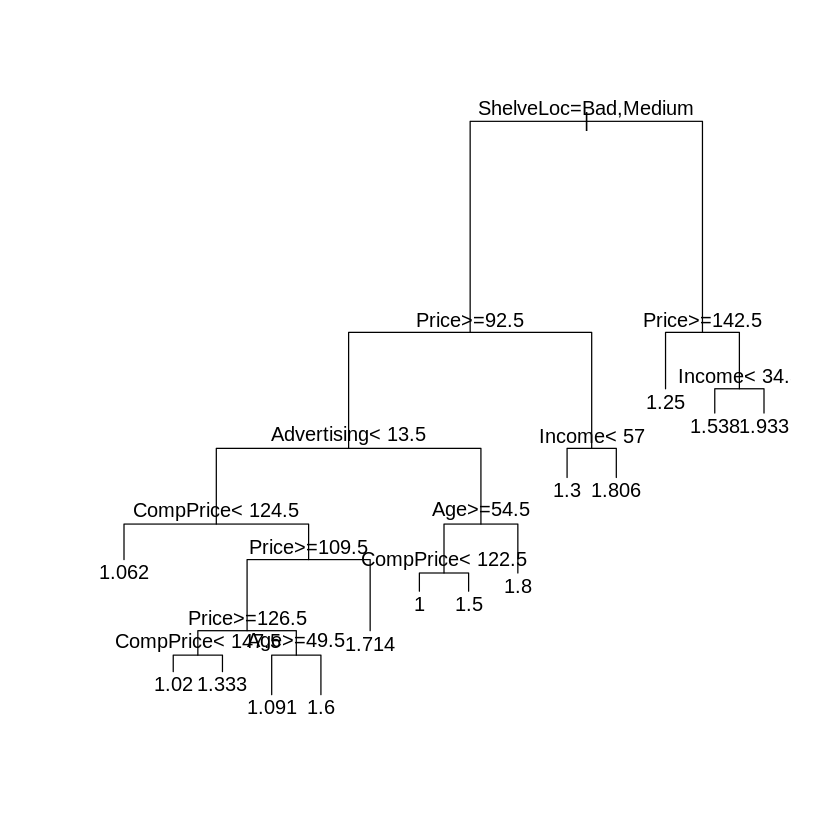

In [5]:
plot(rpart_tree)
text(rpart_tree, pretty=0)

The most important indicator of `Sales` appears to be shelving location, 
since the first branch differentiates `Good` locations from `Bad` and `Medium` locations. 

If we just type the name of the tree object, R prints output corresponding to each branch of the tree. 
R displays the split criterion (e.g. `Price<92.5`), 
the number of observations in that branch, 
the deviance, 
the overall prediction for the branch (Yes or No), 
and the fraction of observations in that branch that take on values of Yes and No. 
Branches that lead to terminal nodes are indicated using asterisks.

In [6]:
rpart_tree

n= 400 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 400 96.760000 1.410000  
    2) ShelveLoc=Bad,Medium 315 67.511110 1.311111  
      4) Price>=92.5 269 49.806690 1.245353  
        8) Advertising< 13.5 224 33.495540 1.183036  
         16) CompPrice< 124.5 96  5.625000 1.062500 *
         17) CompPrice>=124.5 128 25.429690 1.273438  
           34) Price>=109.5 107 16.261680 1.186916  
             68) Price>=126.5 65  5.446154 1.092308  
              136) CompPrice< 147.5 50  0.980000 1.020000 *
              137) CompPrice>=147.5 15  3.333333 1.333333 *
             69) Price< 126.5 42  9.333333 1.333333  
              138) Age>=49.5 22  1.818182 1.090909 *
              139) Age< 49.5 20  4.800000 1.600000 *
           35) Price< 109.5 21  4.285714 1.714286 *
        9) Advertising>=13.5 45 11.111110 1.555556  
         18) Age>=54.5 20  3.750000 1.250000  
           36) CompPrice< 122.5 10  0.000000 1.000000 *
           37) CompPrice>=122.5 10  

#### Using a decision treee

When we need to estimate the test error.
We split the observations into a training set and a test set, 
build the tree using the training set, and evaluate its performance on the test data.
The `predict()` function can be used for this purpose. 
In the case of a classification tree, the argument `type="class"` instructs R to return the actual class prediction.

In [7]:
set.seed (2)
train = sample(1:nrow(Carseats), 200)
Carseats.test = Carseats[-train,]
High.test = High[-train]

In [8]:
rpart_tree <- rpart(High~.-Sales, data=Carseats, subset=train)

yhat = predict(rpart_tree, Carseats.test,type ="class")

table(yhat, High.test)

     High.test
yhat  No Yes
  No  90  20
  Yes 26  64

**Note:** The table command here produces are confusion matrix, a contingency table between expected and predicted values.

Next, we consider whether pruning the tree might lead to improved results. 
The function `prune()` performs cross-validation in order to determine the optimal level of tree complexity. 
Cost complexity pruning is used in order to select a sequence of trees for consideration. 
We use the argument `FUN=prune.misclass` in order to indicate that we want the classification error rate to guide the cross-validation and pruning process. 

The `cv.tree()` function reports the number of terminal nodes of each tree considered (size),
as well as the corresponding error rate and the value of the cost-complexity parameter used 
(k, which corresponds to α in (8.4)).

In [9]:
?prune

The next cell takes a little bit of time to execute!

In [10]:
library(caret)
library(e1071)

set.seed (3)
cpGrid = expand.grid(.cp = seq(0.01,0.5,0.01))

train(High~.-Sales, data = Carseats, method = "rpart", tuneGrid = cpGrid)

Loading required package: lattice
Loading required package: ggplot2


CART 

400 samples
 11 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 400, 400, 400, 400, 400, 400, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.7306143  0.442903612
  0.02  0.7327365  0.445600116
  0.03  0.7181414  0.410436906
  0.04  0.7166029  0.405432257
  0.05  0.7088003  0.385859587
  0.06  0.6981716  0.359629366
  0.07  0.6942653  0.348517501
  0.08  0.6879326  0.340698256
  0.09  0.6838841  0.331136390
  0.10  0.6774273  0.317588573
  0.11  0.6702727  0.297160167
  0.12  0.6669832  0.282019224
  0.13  0.6647914  0.277074964
  0.14  0.6628692  0.271977250
  0.15  0.6638883  0.270372221
  0.16  0.6638883  0.268629349
  0.17  0.6638883  0.268629349
  0.18  0.6633554  0.258957865
  0.19  0.6633554  0.258957865
  0.20  0.6633554  0.258957865
  0.21  0.6633554  0.258957865
  0.22  0.6633554  0.258957865
  0.23  0.6588297  0.242123069
  0.24  0.6472435  0.212406087
  0.2

In [11]:
rpart_tree <- rpart(High~.-Sales, data=Carseats, method="class", cp = 0.5, subset=train)

yhat = predict(rpart_tree, newdata = Carseats.test, type = "class")

table(yhat, High.test)

     High.test
yhat   No Yes
  No  116  84
  Yes   0   0

The accuracy of the model didn't change.
Pruning did not alter the model accuracy. 

# Save your notebook!